In [2]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
import pandas as pd
from osc_toolkit import oscillation, delayed_oscillation
from models import *
from functools import partial

In [3]:
df_fig1f_NatChem_MH = pd.read_csv(r'Data_sets/3b_fig1f_osc_NatChem_MH.csv')
cut_off, CMC_3b = 5.25, 0.52
tau = 0.25
C_A2tol = df_fig1f_NatChem_MH.loc[0, 'cA2'] + df_fig1f_NatChem_MH.loc[0, 'cA'] / 2

df_fig1f_NatChem_MH[['cA2', 'cA']] /= C_A2tol
df_fig1f_NatChem_MH['cS'] /= CMC_3b

for s in ['TimeA2', 'TimeS', 'TimeA']:
    df_fig1f_NatChem_MH[s] /= tau

df_fig1f_NatChem_MH = df_fig1f_NatChem_MH[df_fig1f_NatChem_MH['TimeA2'] < cut_off/tau]

# Full model with H2O2 consumption term

In [8]:
params = np.array([8.5, 0.7, 0.5, 6.2, 20.0])
consts = np.array([0.17, 2])
delay = np.array([0.25, 0.62])
init_cond = np.array([0.05, 0, 0.1])
delayed_model = delayed_oscillation(delayed_full_model_consumeO, delay, params, consts, init_cond, calc_all_delayed_full_model_consumeO)
delayed_model.set_species(['cA2', 'cS', 'cA', 'cO'])
delayed_model.add_exp_data(df_fig1f_NatChem_MH)

The species are ['cA2', 'cS', 'cA', 'cO']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.0120819  0.         1.97583619]


Generating, compiling, and loading C code.
Using default integration parameters.


(0.0, 3.0)

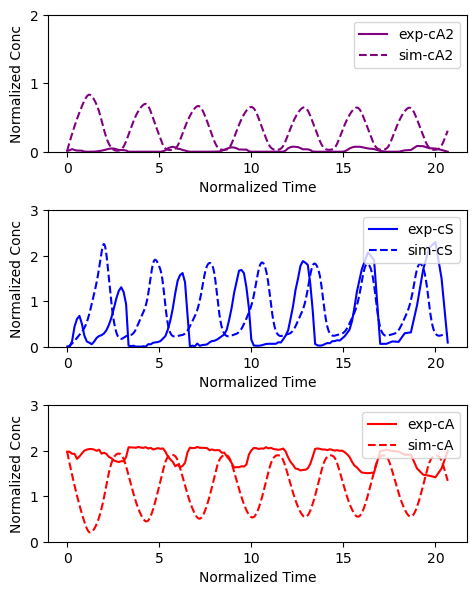

In [9]:
fig, axes = delayed_model.plot(t=6, exp=True, nvars=3)
axes[0].set_ylim(0, 2)
axes[0].set_yticks([0, 1, 2])
axes[1].set_ylim(0, 3)
axes[2].set_ylim(0, 3)